# Kaylah Benton 003049986
## Final Project 12/3/2025
### Title: From Data to Diagnosis: Identifying Patterns in Diabetes Prediction

## Data Understanding and Cleaning

Goal of this section: To thoroughly examine the structure and quality of the dataset, identify issues such as missing values, duplicates, and inconsistent datatypes, and prepare the data for accurate analysis. This includes cleaning the dataset, converting variables to appropriate types, renaming columns for clarity, and creating new features (such as BMI category, age groups, and risk flags) to enable deeper insights in later sections.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np


df = pd.read_csv("diabetes_dataset.csv")

# Display first 5 rows to understand structure
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [2]:
# Check dataset info: datatypes, non-null counts
df.info()

# List all column names
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [3]:
# Count missing/null values in each column
df.isnull().sum()

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [4]:
# Remove unnecessary unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Convert selected columns into categorical types
categorical_cols = [
    "Sex",
    "Ethnicity",
    "Physical_Activity_Level",
    "Alcohol_Consumption",
    "Smoking_Status",
    "Family_History_of_Diabetes",
    "Previous_Gestational_Diabetes"
]

for col in categorical_cols:
    df[col] = df[col].astype("category")

df[categorical_cols].dtypes

Sex                              category
Ethnicity                        category
Physical_Activity_Level          category
Alcohol_Consumption              category
Smoking_Status                   category
Family_History_of_Diabetes       category
Previous_Gestational_Diabetes    category
dtype: object

In [5]:
print("Duplicates found:", df.duplicated().sum())

df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Duplicates found: 0
Shape after removing duplicates: (10000, 20)


In [6]:
# Identify numeric columns and check for negatives
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"{col}: {invalid_count} invalid negative values")

# Optionally: handle negatives by setting them to NaN
df[numeric_cols] = df[numeric_cols].clip(lower=0)

Age: 0 invalid negative values
BMI: 0 invalid negative values
Waist_Circumference: 0 invalid negative values
Fasting_Blood_Glucose: 0 invalid negative values
HbA1c: 0 invalid negative values
Blood_Pressure_Systolic: 0 invalid negative values
Blood_Pressure_Diastolic: 0 invalid negative values
Cholesterol_Total: 0 invalid negative values
Cholesterol_HDL: 0 invalid negative values
Cholesterol_LDL: 0 invalid negative values
GGT: 0 invalid negative values
Serum_Urate: 0 invalid negative values
Dietary_Intake_Calories: 0 invalid negative values


In [7]:
df = df.rename(columns={
    "Blood_Pressure_Systolic": "BP_Systolic",
    "Blood_Pressure_Diastolic": "BP_Diastolic",
    "Fasting_Blood_Glucose": "Fasting_Glucose",
    "Waist_Circumference": "Waist_Circ"
})

df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circ,Fasting_Glucose,HbA1c,BP_Systolic,BP_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [8]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(bmi_category)
df["BMI_Category"] = df["BMI_Category"].astype("category")

df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circ,Fasting_Glucose,HbA1c,BP_Systolic,BP_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,BMI_Category
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,Obese
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,Normal
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,Overweight
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,Obese
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,Obese


In [9]:
bins = [0, 20, 35, 50, 65, 120]
labels = ["<20", "20–35", "35–50", "50–65", "65+"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["Age_Group"] = df["Age_Group"].astype("category")

df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circ,Fasting_Glucose,HbA1c,BP_Systolic,BP_Diastolic,Cholesterol_Total,...,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,BMI_Category,Age_Group
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,37.5,7.2,Moderate,1538,Moderate,Never,0,1,Obese,50–65
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,88.5,6.1,Moderate,2653,Moderate,Current,0,1,Normal,35–50
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,56.2,6.9,Low,1684,Heavy,Former,1,0,Overweight,20–35
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,34.4,5.4,Low,3796,Moderate,Never,1,0,Obese,50–65
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,81.9,7.4,Moderate,3161,Heavy,Current,0,0,Obese,20–35


In [10]:
df["High_BP"] = np.where((df["BP_Systolic"] >= 130) | (df["BP_Diastolic"] >= 80), 1, 0)

def glucose_status(value):
    if value < 100:
        return "Normal"
    elif 100 <= value < 126:
        return "Prediabetic"
    else:
        return "Diabetic"

df["Glucose_Status"] = df["Fasting_Glucose"].apply(glucose_status)
df["Glucose_Status"] = df["Glucose_Status"].astype("category")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            10000 non-null  int64   
 1   Sex                            10000 non-null  category
 2   Ethnicity                      10000 non-null  category
 3   BMI                            10000 non-null  float64 
 4   Waist_Circ                     10000 non-null  float64 
 5   Fasting_Glucose                10000 non-null  float64 
 6   HbA1c                          10000 non-null  float64 
 7   BP_Systolic                    10000 non-null  int64   
 8   BP_Diastolic                   10000 non-null  int64   
 9   Cholesterol_Total              10000 non-null  float64 
 10  Cholesterol_HDL                10000 non-null  float64 
 11  Cholesterol_LDL                10000 non-null  float64 
 12  GGT                            10

,Age,Sex,Ethnicity,BMI,Waist_Circ,Fasting_Glucose,HbA1c,BP_Systolic,BP_Diastolic,Cholesterol_Total,...,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,BMI_Category,Age_Group,High_BP,Glucose_Status
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,Moderate,1538,Moderate,Never,0,1,Obese,50–65,1,Prediabetic
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,Moderate,2653,Moderate,Current,0,1,Normal,35–50,1,Diabetic
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,Low,1684,Heavy,Former,1,0,Overweight,20–35,1,Diabetic
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,Low,3796,Moderate,Never,1,0,Obese,50–65,1,Diabetic
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,Moderate,3161,Heavy,Current,0,0,Obese,20–35,1,Diabetic


In [11]:
df.to_csv("diabetes_cleaned.csv", index=False)

## **Summary of Data Understanding & Cleaning**

During the initial phase of the project, several steps were taken to understand and prepare the dataset for analysis:


### **Data Understanding**

* Explored the structure of the dataset by reviewing the first few rows, data types, and summary information.
* Identified key columns, including biometric, lifestyle, and metabolic health indicators.
* Checked for missing values across all 21 columns.
* Examined the presence of duplicates and removed them to ensure data accuracy.


### **Data Cleaning Steps**

* Removed unnecessary index columns such as **"Unnamed: 0"**.
* Converted multiple text-based fields into categorical data types, including:

  * **Sex**
  * **Ethnicity**
  * **Physical_Activity_Level**
  * **Alcohol_Consumption**
  * **Smoking_Status**
  * **Family_History_of_Diabetes**
  * **Previous_Gestational_Diabetes**
* Checked all numeric columns for invalid negative values and corrected them.
* Standardized and simplified column names for clarity, including:

  * `Blood_Pressure_Systolic` → `BP_Systolic`
  * `Blood_Pressure_Diastolic` → `BP_Diastolic`
  * `Fasting_Blood_Glucose` → `Fasting_Glucose`
  * `Waist_Circumference` → `Waist_Circ`


### **Feature Engineering**

New derived columns were created to support deeper analysis:

* **BMI_Category** — classified individuals into underweight, normal, overweight, or obese.
* **Age_Group** — grouped ages into meaningful ranges.
* **High_BP** — a flag indicating high blood pressure based on systolic/diastolic thresholds.
* **Glucose_Status** — categorized fasting glucose values into normal, prediabetic, or diabetic.

### **Final Output**

* All cleaning and transformations were completed successfully.
* The cleaned dataset was saved as **`diabetes_cleaned.csv`** for use in further exploratory analysis and modeling.


______________________________________
## Data Visualization and Interpretation 

In this section, we explore patterns and relationships in the diabetes dataset using visualizations. We examine distributions of numeric variables like BMI, waist circumference, fasting glucose, and HbA1c, and compare categorical groups such as sex, smoking status, activity level, BMI category, age group, family history, and high blood pressure.  

We also use engineered features to reveal hidden patterns and visualize correlations among biometric metrics. This analysis helps identify factors and groups associated with higher diabetes risk, providing insights for further analysis or predictive modeling.


In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visual theme
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10,6)

#  Load the cleaned CSV
df = pd.read_csv("diabetes_cleaned.csv")

# Check first rows
df.head()

# Dataset structure and summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circ                     10000 non-null  float64
 5   Fasting_Glucose                10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   BP_Systolic                    10000 non-null  int64  
 8   BP_Diastolic                   10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

,Age,BMI,Waist_Circ,Fasting_Glucose,HbA1c,BP_Systolic,BP_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes,High_BP
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500,0.851600
std,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753,0.355514
min,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000,0.000000
25%,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000,1.000000
50%,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000,1.000000
75%,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000,1.000000
max,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000,1.000000


In [13]:
categorical_cols = [
    "Sex",
    "Ethnicity",
    "Physical_Activity_Level",
    "Alcohol_Consumption",
    "Smoking_Status",
    "Family_History_of_Diabetes",
    "Previous_Gestational_Diabetes",
    "BMI_Category",
    "Age_Group",
    "Glucose_Status",
    "High_BP"
]

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")

Unique values in Sex:
Sex
Female    5005
Male      4995
Name: count, dtype: int64


Unique values in Ethnicity:
Ethnicity
Black       2539
Asian       2503
White       2482
Hispanic    2476
Name: count, dtype: int64


Unique values in Physical_Activity_Level:
Physical_Activity_Level
Low         3372
High        3341
Moderate    3287
Name: count, dtype: int64


Unique values in Alcohol_Consumption:
Alcohol_Consumption
Moderate    3373
Heavy       3307
Name: count, dtype: int64


Unique values in Smoking_Status:
Smoking_Status
Current    3364
Former     3330
Never      3306
Name: count, dtype: int64


Unique values in Family_History_of_Diabetes:
Family_History_of_Diabetes
1    5070
0    4930
Name: count, dtype: int64


Unique values in Previous_Gestational_Diabetes:
Previous_Gestational_Diabetes
1    5165
0    4835
Name: count, dtype: int64


Unique values in BMI_Category:
BMI_Category
Obese         4785
Normal        2856
Overweight    2359
Name: count, dtype: int64


Unique values in A

## Graph 1: Family History of Diabetes by Gender

The comparison between family history of diabetes and gender shows no meaningful correlation. Both males and females have similar proportions of “Yes” and “No” responses, indicating that family history is evenly distributed across genders in this dataset. This suggests that hereditary risk does not differ by gender within this sample.

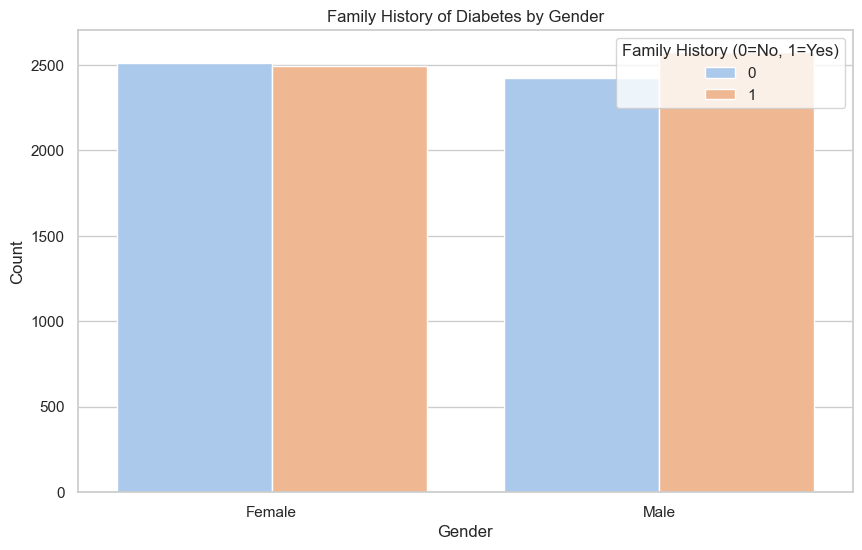

In [14]:
sns.countplot(data=df, x="Sex", hue="Family_History_of_Diabetes")
plt.title("Family History of Diabetes by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Family History (0=No, 1=Yes)")

plt.savefig("family_history_by_gender.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 2: BMI Distribution by Ethnicity

BMI levels appear consistent across ethnic groups, showing little to no correlation between BMI and ethnicity. While Asian and Black groups show slightly lower upper quartile values, the overall BMI ranges overlap significantly, suggesting ethnicity is not a strong separator of BMI trends in this dataset.

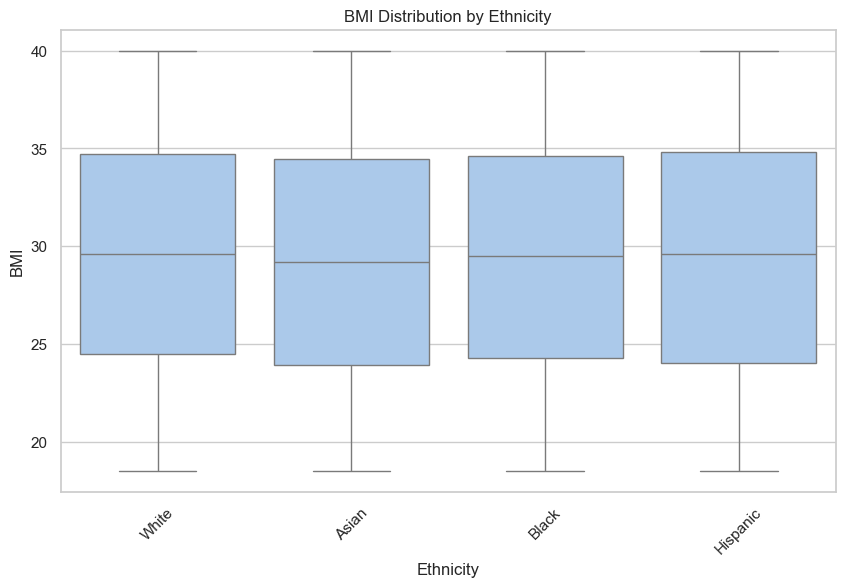

In [15]:
sns.boxplot(data=df, x="Ethnicity", y="BMI")
plt.title("BMI Distribution by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("BMI")
plt.xticks(rotation=45)

plt.savefig("bmi_distribution_by_ethnicity.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 3: Distribution of Fasting Blood Glucose by Glucose Status

The distribution of fasting blood glucose shows no apparent skew, with values relatively balanced across the Normal, Prediabetic, and Diabetic groups. The histogram indicates that glucose levels are spread evenly without strong asymmetry, suggesting a fairly symmetrical distribution within each glucose status category.

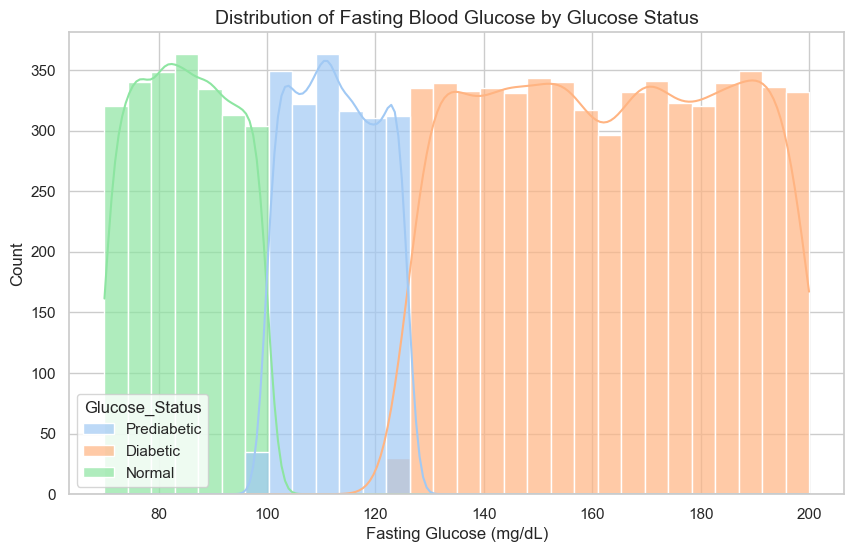

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x="Fasting_Glucose",
    hue="Glucose_Status",
    bins=30,
    kde=True,
    alpha=0.7
)

plt.title("Distribution of Fasting Blood Glucose by Glucose Status", fontsize=14)
plt.xlabel("Fasting Glucose (mg/dL)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.savefig("fasting_glucose_by_status.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 4: HbA1c Distribution by Physical Activity Level

The distribution of HbA1c across different physical activity levels shows no apparent difference. Individuals with low, moderate, or high activity have similar HbA1c values, indicating that, in this dataset, physical activity level does not appear to strongly influence average glucose control.

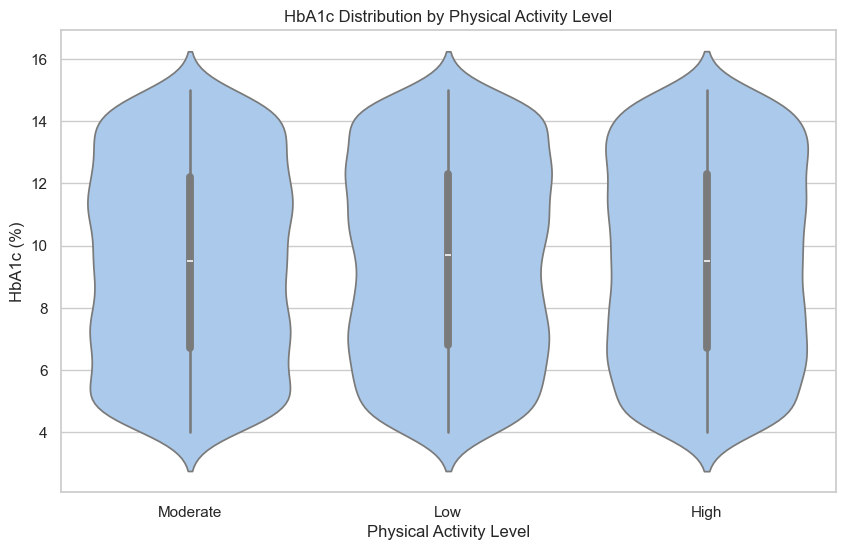

In [17]:
sns.violinplot(data=df, x="Physical_Activity_Level", y="HbA1c")
plt.title("HbA1c Distribution by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("HbA1c (%)")

plt.savefig("hba1c_by_activity_level.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 5: BMI vs Waist Circumference

The scatter plot shows no apparent correlation between BMI and waist circumference in this dataset. Data points are scattered evenly across the plot, indicating that higher BMI does not consistently correspond to larger waist measurements, and waist circumference alone may not reliably reflect overall body mass in this sample.

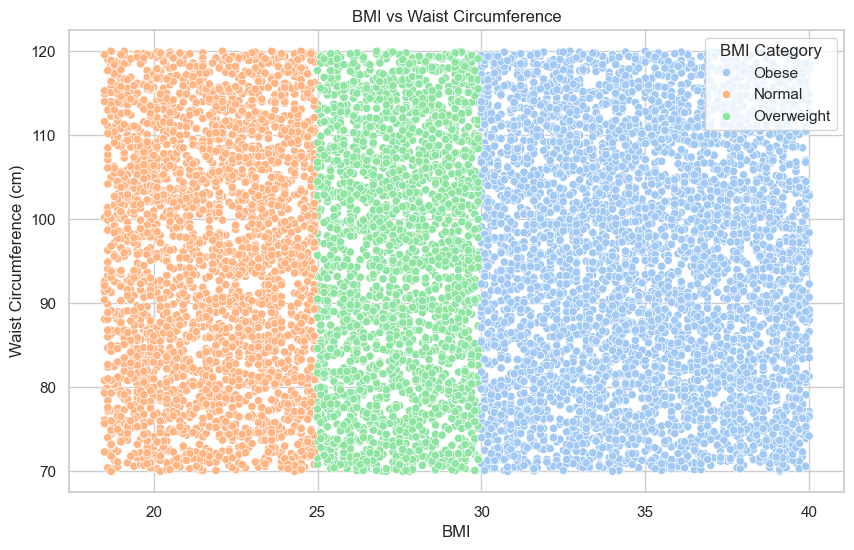

In [18]:
sns.scatterplot(data=df, x="BMI", y="Waist_Circ", hue="BMI_Category")
plt.title("BMI vs Waist Circumference")
plt.xlabel("BMI")
plt.ylabel("Waist Circumference (cm)")
plt.legend(title="BMI Category")

plt.savefig("bmi_vs_waist_circumference.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 6: Correlation Heatmap of Biometric Metrics

The correlation heatmap shows that most numeric variables in the dataset have extremely low correlations with each other, generally ranging between -0.02 and 0.02. This indicates that biometric metrics such as BMI, waist circumference, blood pressure, cholesterol, and glucose levels are largely independent in this dataset, with no strong linear relationships observed among them.

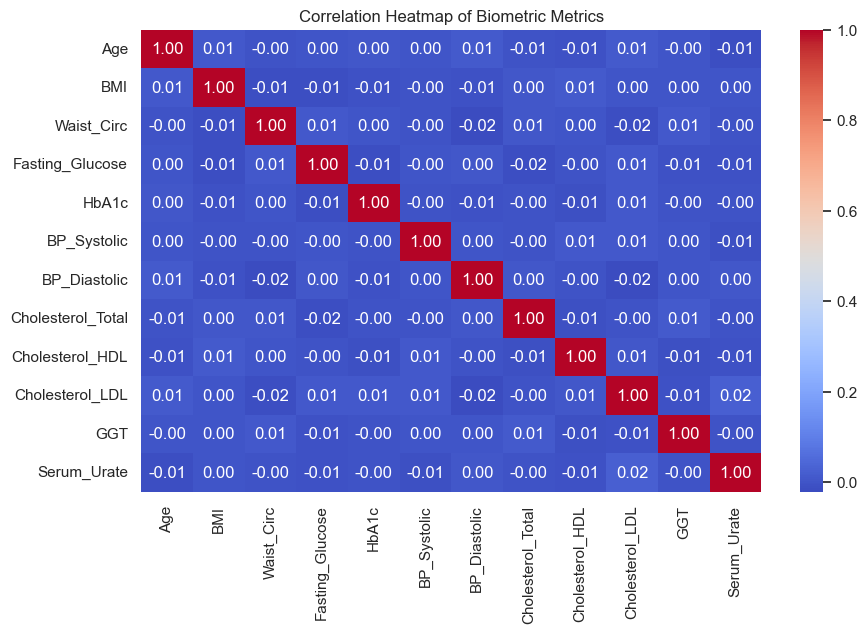

In [19]:
numeric_cols = [
    "Age", "BMI", "Waist_Circ", "Fasting_Glucose", "HbA1c",
    "BP_Systolic", "BP_Diastolic", "Cholesterol_Total",
    "Cholesterol_HDL", "Cholesterol_LDL", "GGT", "Serum_Urate"
]

sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Biometric Metrics")

plt.savefig("correlation_heatmap_biometric_metrics.png", dpi=300, bbox_inches='tight')

plt.show()

## Summary of Data Visualization and Interpretation

The exploratory visualizations revealed limited apparent relationships in this dataset:

1. **Family History of Diabetes by Gender:** Both males and females have similar proportions of individuals with and without a family history, showing no clear gender-based trend.  
2. **BMI Distribution by Ethnicity:** BMI values are fairly consistent across ethnic groups, with only minor differences in interquartile ranges for Asian and Black individuals, indicating little to no correlation between BMI and ethnicity.  
3. **Fasting Blood Glucose by Glucose Status:** The histogram shows no apparent skew; glucose levels are relatively balanced across Normal, Prediabetic, and Diabetic groups.  
4. **HbA1c by Physical Activity Level:** HbA1c values are similar across low, moderate, and high activity levels, suggesting no clear relationship between activity level and average glucose control.  
5. **BMI vs Waist Circumference:** Data points are scattered evenly with no apparent correlation, indicating that waist circumference does not consistently correspond to BMI in this dataset.  
6. **Correlation Heatmap of Biometric Metrics:** Numeric variables show very weak correlations, mostly between -0.02 and 0.02, indicating that biometric measures are largely independent.  

**Overall:** The visualizations suggest that raw biometric, lifestyle, and hereditary features in this dataset do not exhibit strong linear relationships or clear patterns. Derived features such as BMI categories, age groups, high blood pressure flags, and glucose status help reveal patterns that may be more informative for assessing diabetes risk.


## Additional Visualization and Research Questions

## Graph 7: Diabetes Status by BMI Category

The plot shows that individuals in the Obese category have the highest number of diabetic cases, followed by those in the Normal category and then Overweight. This suggests that higher BMI is associated with increased diabetes prevalence, although some normal-weight individuals also have diabetes, indicating that BMI alone does not fully predict diabetes risk.

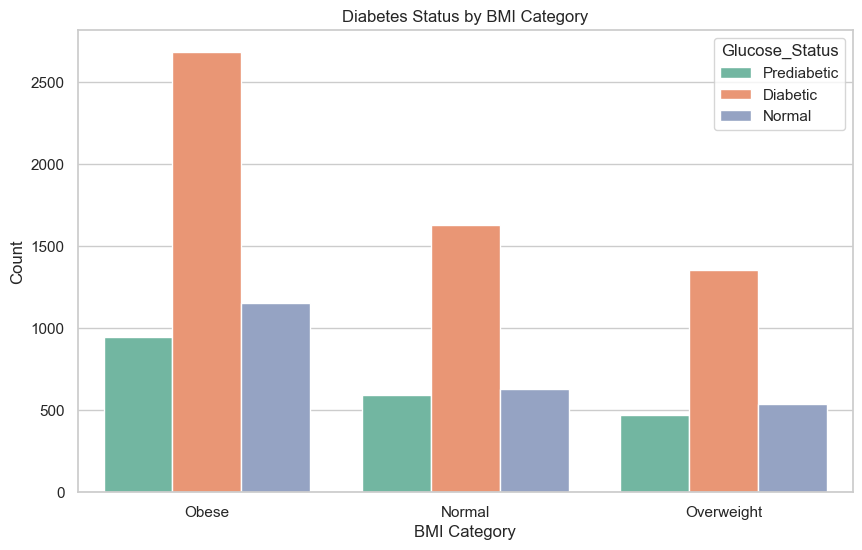

In [20]:
sns.countplot(data=df, x="BMI_Category", hue="Glucose_Status", palette="Set2")
plt.title("Diabetes Status by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")

plt.savefig("diabetes_status_by_bmi_category.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 8: Diabetes Status by Alcohol Consumption

The plot shows no apparent correlation between alcohol consumption and diabetes status. Individuals with moderate and heavy alcohol consumption have similar counts across glucose status categories, suggesting that alcohol intake alone does not clearly predict diabetes risk in this dataset.

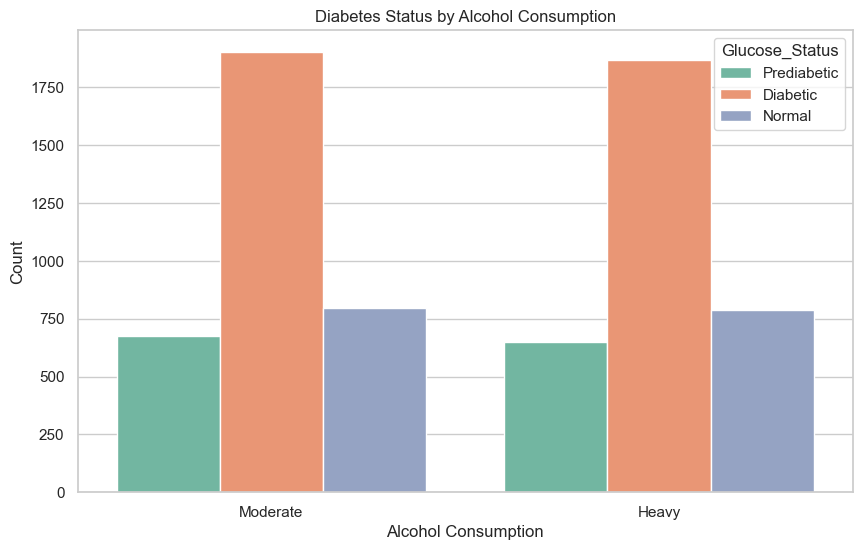

In [21]:
sns.countplot(data=df, x="Alcohol_Consumption", hue="Glucose_Status", palette="Set2")
plt.title("Diabetes Status by Alcohol Consumption")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")

plt.savefig("diabetes_status_by_alcohol_consumption.png", dpi=300, bbox_inches='tight')

plt.show()

## Graph 9: Lifestyle Score by Glucose Status

The plot shows that individuals with lifestyle scores of 4.0 and 5.0 have the highest counts of diabetic cases, while scores of 3 and 6 have nearly equal counts. This indicates that moderate lifestyle scores may be associated with higher diabetes prevalence in this dataset, although there is no clear linear trend.

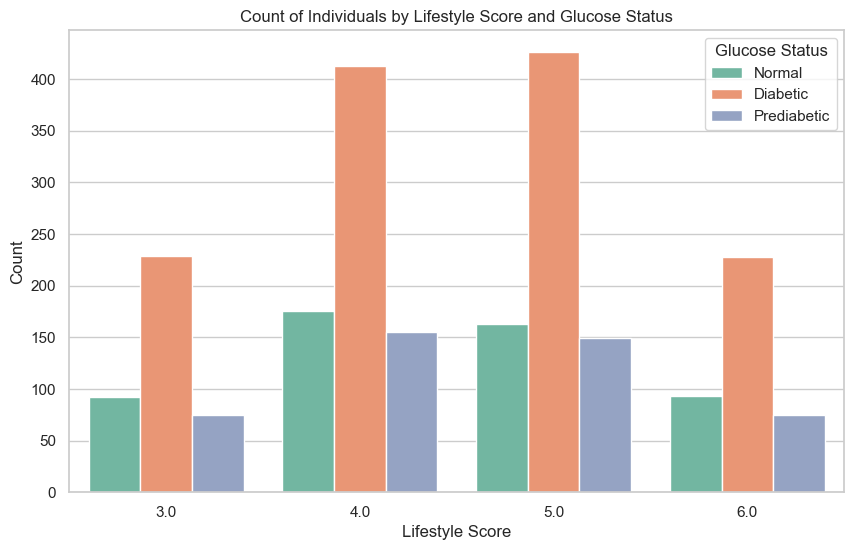

In [22]:
df = df.copy()

df['Lifestyle_Score'] = 0

activity_mapping = {"Low": 1, "Moderate": 2, "High": 3}
df['Lifestyle_Score'] += df['Physical_Activity_Level'].map(activity_mapping)

smoking_mapping = {"Non-Smoker": 3, "Former": 2, "Current": 1}
df['Lifestyle_Score'] += df['Smoking_Status'].map(smoking_mapping)

alcohol_mapping = {"None": 3, "Low": 2, "Moderate": 1, "High": 0}
df['Lifestyle_Score'] += df['Alcohol_Consumption'].map(alcohol_mapping)


df['Lifestyle_Score'].describe()

sns.countplot(data=df, x="Lifestyle_Score", hue="Glucose_Status", palette="Set2")
plt.title("Count of Individuals by Lifestyle Score and Glucose Status")
plt.xlabel("Lifestyle Score")
plt.ylabel("Count")
plt.legend(title="Glucose Status")

plt.savefig("lifestyle_score_by_glucose_status.png", dpi=300, bbox_inches='tight')

plt.show()

## Summary of Findings from Key Graphs

The analysis of key visualizations provides insights into the factors influencing diabetes risk. BMI appears to be a notable factor, with higher counts of diabetes observed among individuals in the Obese category, while normal-weight and overweight individuals also show cases, indicating that body weight alone is not the sole predictor. Alcohol consumption does not show a clear relationship with diabetes status, as counts remain similar across different levels of intake. Lifestyle scores, representing combined health behaviors, reveal that individuals with mid-range scores show higher diabetes counts, suggesting that simple numeric lifestyle measures may not fully capture risk patterns. 

### Insights Derived
- **Strongest Associated Features:** BMI and moderate lifestyle scores appear to have the most visible association with diabetes status.  
- **Demographic Patterns:** While BMI shows clear trends, lifestyle and alcohol intake do not show strong associations.  
- **Lifestyle Factors:** Lifestyle behaviors may interact in complex ways; moderate scores showing higher diabetes counts could reflect mixed behaviors.  
- **Risk Combinations:** Obese individuals with moderate lifestyle scores may be particularly at risk.  
 

These observations highlight the importance of considering **both biometric and behavioral factors** when assessing diabetes risk and indicate areas for further exploration in preventive health strategies.
